In [1]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/PCA/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# save the labels into a variable l.
l = data['label']

# Drop the label feature and store the pixel data in d.
data = data.drop("label",axis=1)

In [5]:
data.shape

(42000, 784)

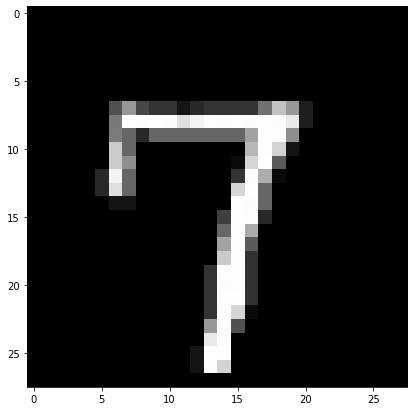

7


In [6]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 6

grid_data = data.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

## 1 — Data preprocessing

In [7]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(42000, 784)


## 2 — Compute covariance matrix

In [8]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)
print("The shape of variance matrix =", covar_matrix.shape)

The shape of variance matrix = (784, 784)


## 3 — Compute eigenvalue and eigenvector

In [9]:
# Finding the top two eigen-values and corresponding eigen-vectors for projecting onto a 2-Dim space.
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.eigh.html


from scipy.linalg import eigh
# the parameter ‘eigvals’ is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783)(index) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print("Shape of eigen vectors = ",vectors.shape)

# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [10]:
# Projecting the original data sample on the plane formed by two principal eigenvectors by vector-vector multiplication

new_coordinates = np.matmul(vectors, sample_data.T)
print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


In [11]:
# Appending label to the 2d projected data(vertical stack) and creating a new data frame for plotting the labeled points

new_coordinates = np.vstack((new_coordinates, l)).T
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


## 4 — Plotting

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


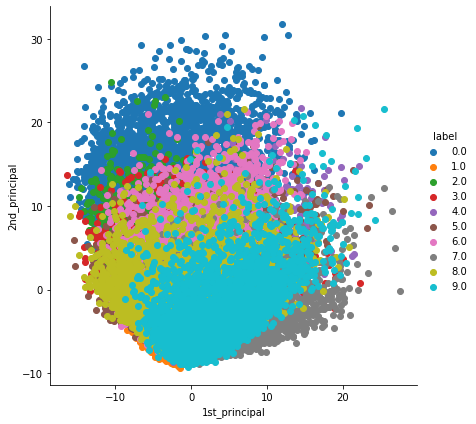

In [14]:
# plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, "1st_principal", "2nd_principal").add_legend()
plt.show()

## 5 — PCA for dimension reduction

In [15]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# PCA for dimensionality redcution (non-visualization)
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

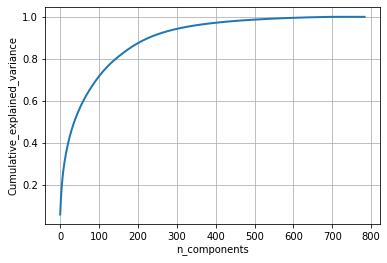

In [17]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis("tight")
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative_explained_variance")
plt.show()

***Here we plot the cumulative sum of variance with the component. Here 300 components explain the almost 90% variance. So we can reduce the dimension according to the required variance.***